<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("_m4_survey_data.sqlite") 
# open a database connection

Import pandas module.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('_m3_survey_data.csv')

In [5]:
# Write the dataframe to the SQLite database
df.to_sql('master', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## Demo: How to run an sql query


In [6]:
# open a database connection
conn = sqlite3.connect("_m4_survey_data.sqlite") 


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11237


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,master


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,686
1,16.0,3
2,17.0,6
3,18.0,28
4,19.0,78
5,20.0,107
6,21.0,201
7,22.0,398
8,22.5,1
9,23.0,574


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"Unnamed: 0.1" INTEGER,
  "Unnamed: 0" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "EduOther" TEXT,
  "OrgSize" TEXT,
  "YearsCode" REAL,
  "Age1stCode" REAL,
  "YearsCodePro" REAL,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkPlan" TEXT,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedi

In [11]:
# Close the connection
conn.close()

# Hands-on Lab


## Visualizing distribution of data


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('_m3_survey_data.csv')

### Histograms


Plot a histogram of `ConvertedComp.`


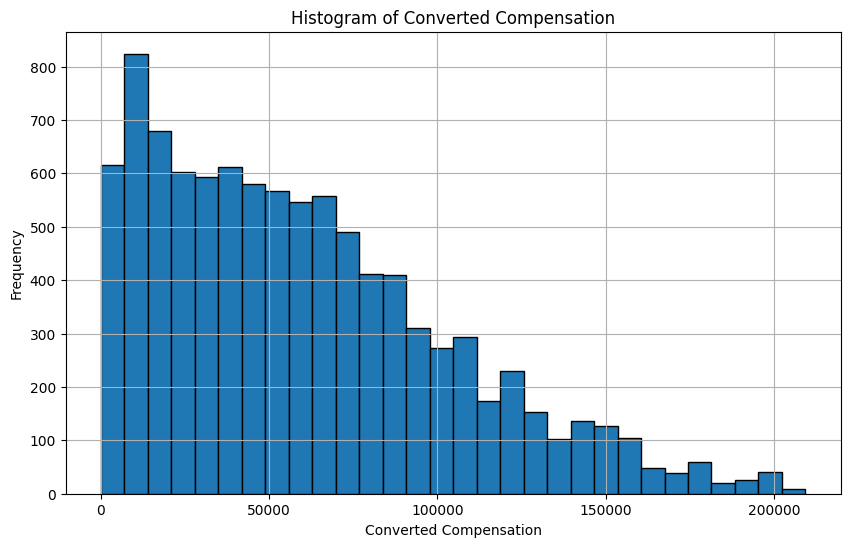

In [14]:
# Plot the histogram of ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


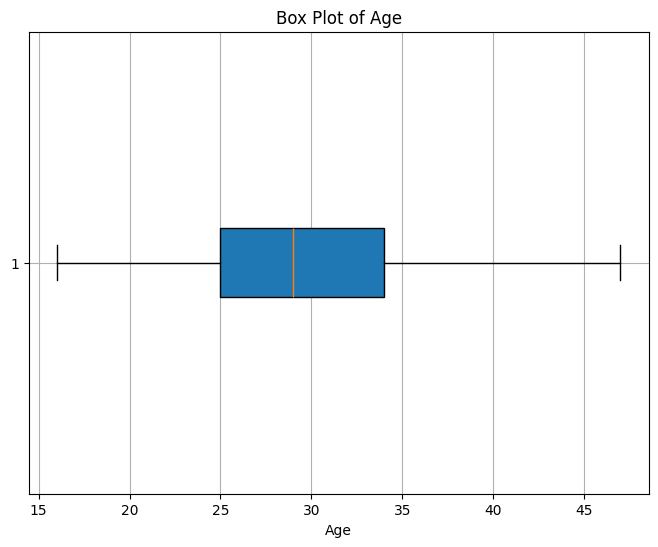

In [15]:
# Plot the box plot of Age
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


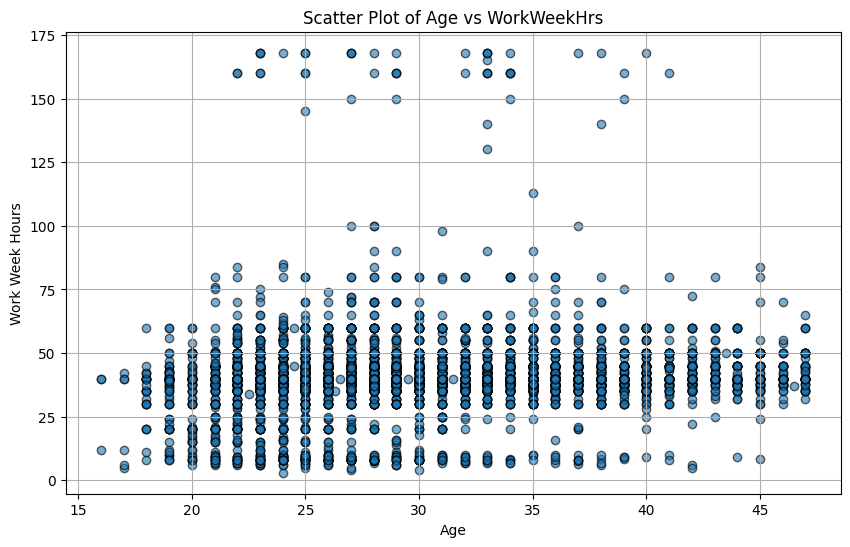

In [16]:
# Drop rows with NaN values in relevant columns
df_filtered = df[['Age', 'WorkWeekHrs']].dropna()

# Plot the scatter plot of Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age'], df_filtered['WorkWeekHrs'], alpha=0.6, edgecolors='black')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


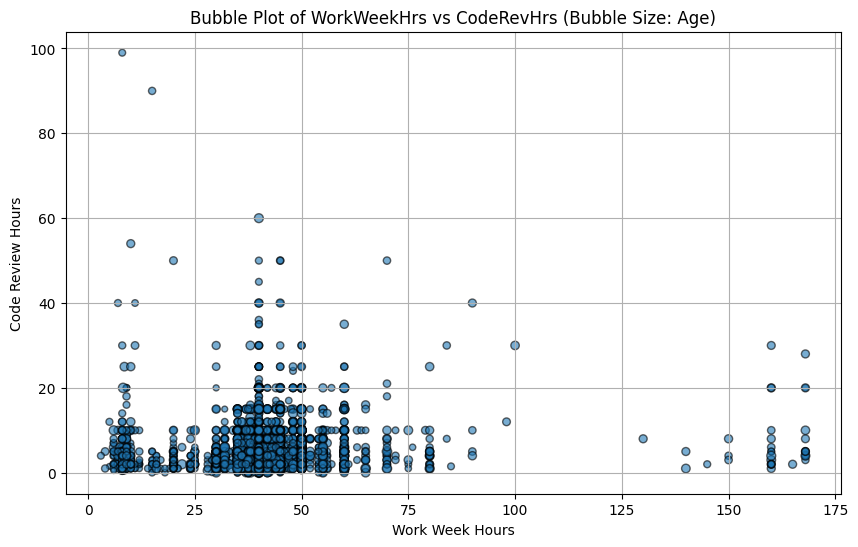

In [17]:
# Drop rows with NaN values in relevant columns
df_filtered = df[['WorkWeekHrs', 'CodeRevHrs', 'Age']].dropna()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_filtered['WorkWeekHrs'],
    df_filtered['CodeRevHrs'],
    s=df_filtered['Age'],  # Scale the bubble size
    alpha=0.6,
    edgecolors='black'
)

# Add titles and labels
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble Size: Age)')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


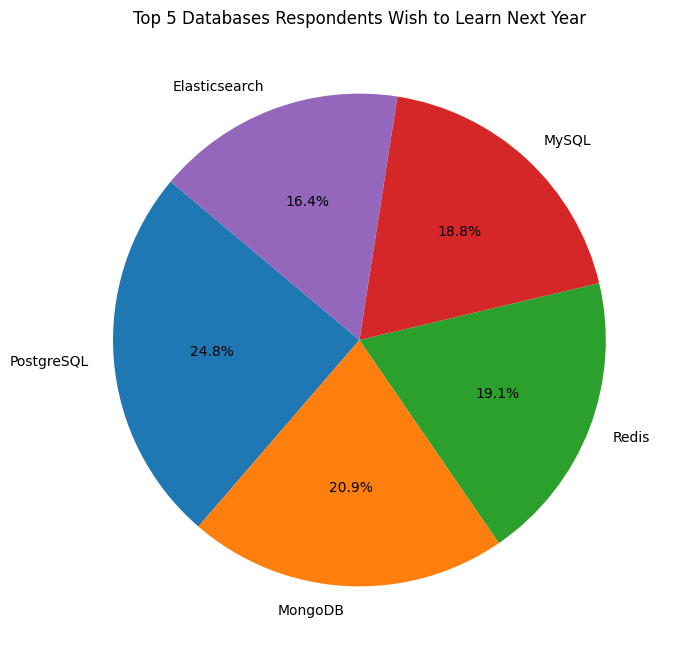

In [18]:
# Filter columns that start with 'DatabaseDesireNextYear_'
db_columns = [col for col in df.columns if col.startswith('DatabaseDesireNextYear_')]

# Summing up each filtered column to get the count of respondents desiring each database
db_counts = df[db_columns].sum().sort_values(ascending=False)

# Selecting the top 5 databases
top_5_dbs = db_counts.head(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_dbs, labels=top_5_dbs.index.str.replace('DatabaseDesireNextYear_', ''),
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()


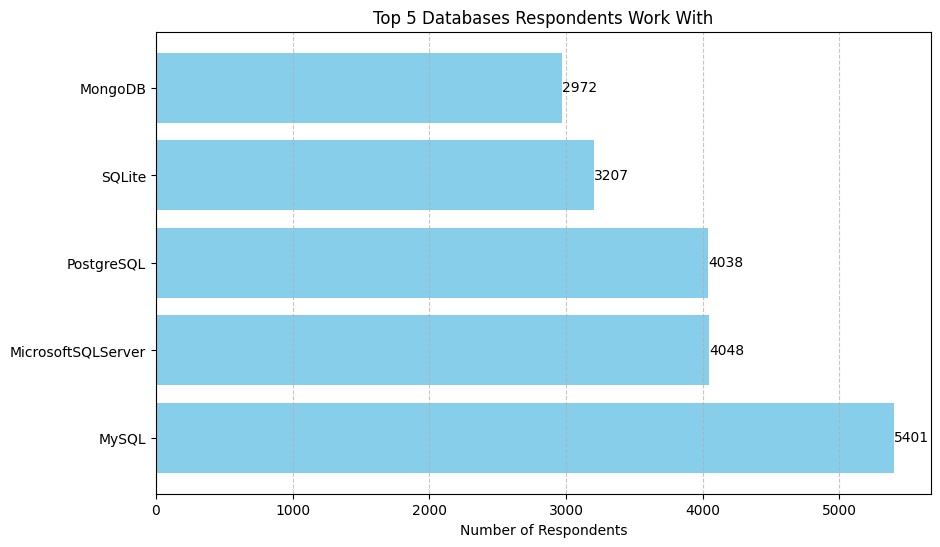

In [19]:
# Filter columns that start with 'DatabaseWorkedWith'
db_columns = [col for col in df.columns if col.startswith('DatabaseWorkedWith_')]

# Summing up each filtered column to get the count of respondents desiring each database
db_counts = df[db_columns].sum().sort_values(ascending=False)

# Selecting the top 5 databases
top_5_dbs = db_counts.head(5)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_dbs.index.str.replace('DatabaseWorkedWith_', ''), top_5_dbs.values, color='skyblue')
# Adding the count of respondents on each bar
for bar, count in zip(bars, top_5_dbs.values):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center')
plt.xlabel('Number of Respondents')
plt.title('Top 5 Databases Respondents Work With')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Filter columns that start with 'DatabaseWorkedWith'
db_columns = [col for col in df.columns if col.startswith('DatabaseWorkedWith_')]

# Create a boolean mask for respondents who work on 'MySQL' only
mysql_only_mask = (df['DatabaseWorkedWith_MySQL'] == 1) & (df[db_columns].sum(axis=1) == 1)

# Count the number of respondents who work on 'MySQL' only
mysql_only_count = mysql_only_mask.sum()

print(f"Number of respondents who work on 'MySQL' only: {mysql_only_count}")

Number of respondents who work on 'MySQL' only: 488


In [21]:
# Filter columns that start with 'LanguageDesireNextYear'
db_columns = [col for col in df.columns if col.startswith('LanguageDesireNextYear_')]

# Summing up each filtered column to get the count of respondents desiring each database
language_counts = df[db_columns].sum().sort_values(ascending=False)

# Finding the rank of Python
python_rank = language_counts.index.get_loc('LanguageDesireNextYear_Python') + 1

print(f"Rank of Python: {python_rank}")

Rank of Python: 7


In [22]:
# Count the number of respondents who indicated they work with SQL
sql_count = df['LanguageWorkedWith_SQL'].sum()

print(f"Number of respondents who currently work with SQL: {sql_count}")

Number of respondents who currently work with SQL: 7007


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


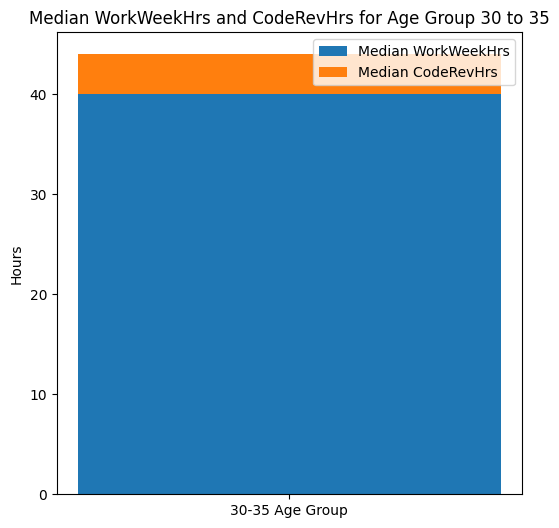

In [23]:
# Filtering the dataframe for age group 30 to 35
age_filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculating median values for WorkWeekHrs and CodeRevHrs
median_work_week_hrs = age_filtered_df['WorkWeekHrs'].median()
median_code_rev_hrs = age_filtered_df['CodeRevHrs'].median()

# Creating a stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar(['30-35 Age Group'], median_work_week_hrs, label='Median WorkWeekHrs')
plt.bar(['30-35 Age Group'], median_code_rev_hrs, bottom=median_work_week_hrs, label='Median CodeRevHrs')

# Adding labels and legend
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Hours')
plt.legend()
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


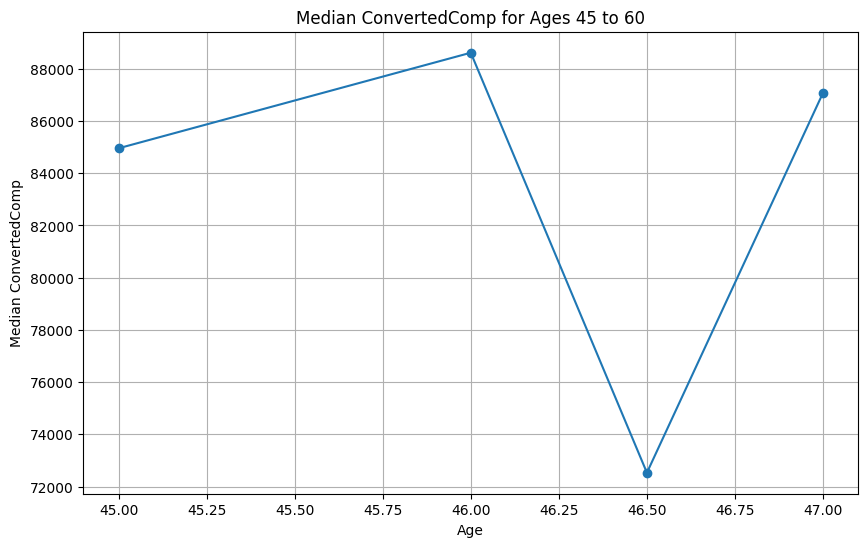

In [24]:
# Filtering the dataframe for age group 45 to 60
age_filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Grouping by Age and calculating the median ConvertedComp
median_converted_comp = age_filtered_df.groupby('Age')['ConvertedComp'].median()

# Plotting the median ConvertedComp for each age
plt.figure(figsize=(10, 6))
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


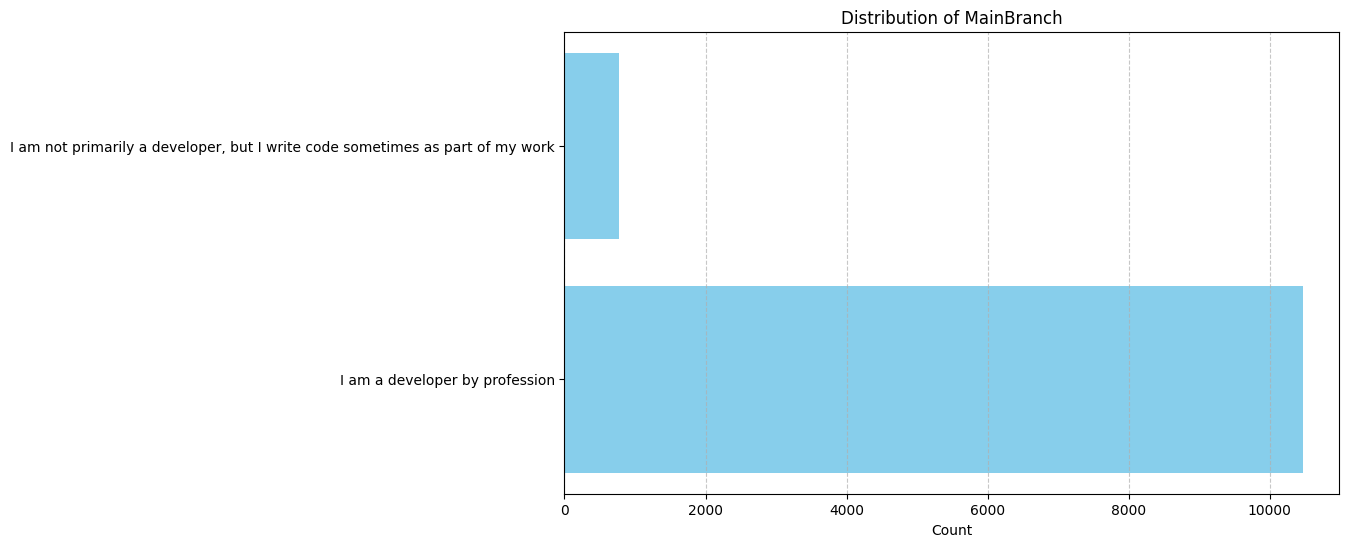

In [25]:
# Counting occurrences of each unique value in MainBranch
main_branch_counts = df['MainBranch'].value_counts()

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(main_branch_counts.index, main_branch_counts.values, color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of MainBranch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
